In [1]:
!pip install catboost
import requests
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
# General libraries
import numpy as np
import pandas as pd
import os
import joblib

# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report


#machine learning Algorithms For Classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.1 MB/s eta 0:00:00


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")

print("Path to dataset files:", path)

100%|██████████| 8.91k/8.91k [00:00<00:00, 13.2MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/uciml/pima-indians-diabetes-database/versions/1


In [3]:
data = pd.read_csv(os.path.join(path, 'diabetes.csv'))
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info(),data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(None,
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
 count   768.000000  768.000000     768.000000     768.000000  768.000000   
 mean      3.845052  120.894531      69.105469      20.536458   79.799479   
 std       3.369578   31.972618      19.355807      15.952218  115.244002   
 min       0.000000    0.000000       0.000000       0.000000    0.000000   
 25%       1.000000   99.000000      62.000000       0.000000    0.000000   
 50%       3.000000  117.000000      72.000000      23.000000   30.500000   
 75%       6.000000  140.250000      80.000000      32.000000  127.250000   
 max      17.000000  199.000000     122.000000      99.000000  846.000000   
 
               BMI  DiabetesPedigreeFunction         Age     Outcome  
 count  768.000000                768.000000  768.000000  768.000000  
 mean    31.992578                  0.471876   33.240885    0.348958  
 std      7.884160                  0.331329   11.760232    0.476951  
 min      0.00

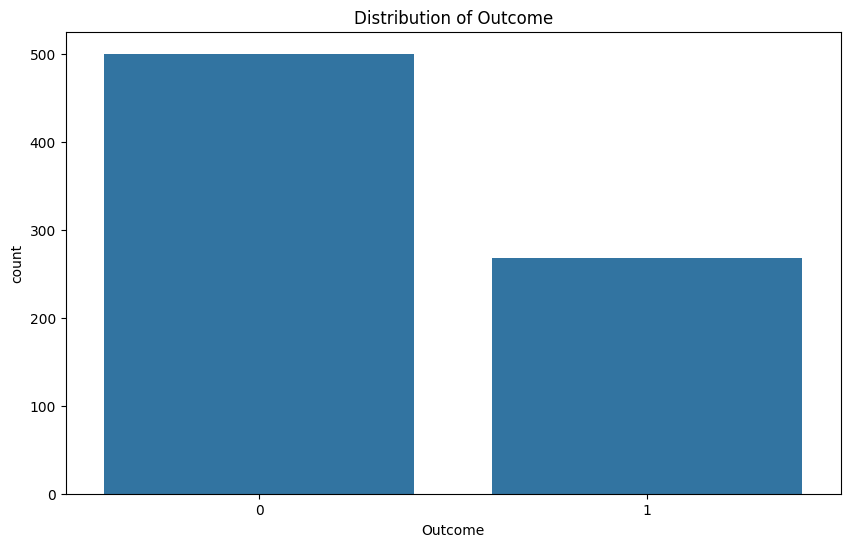

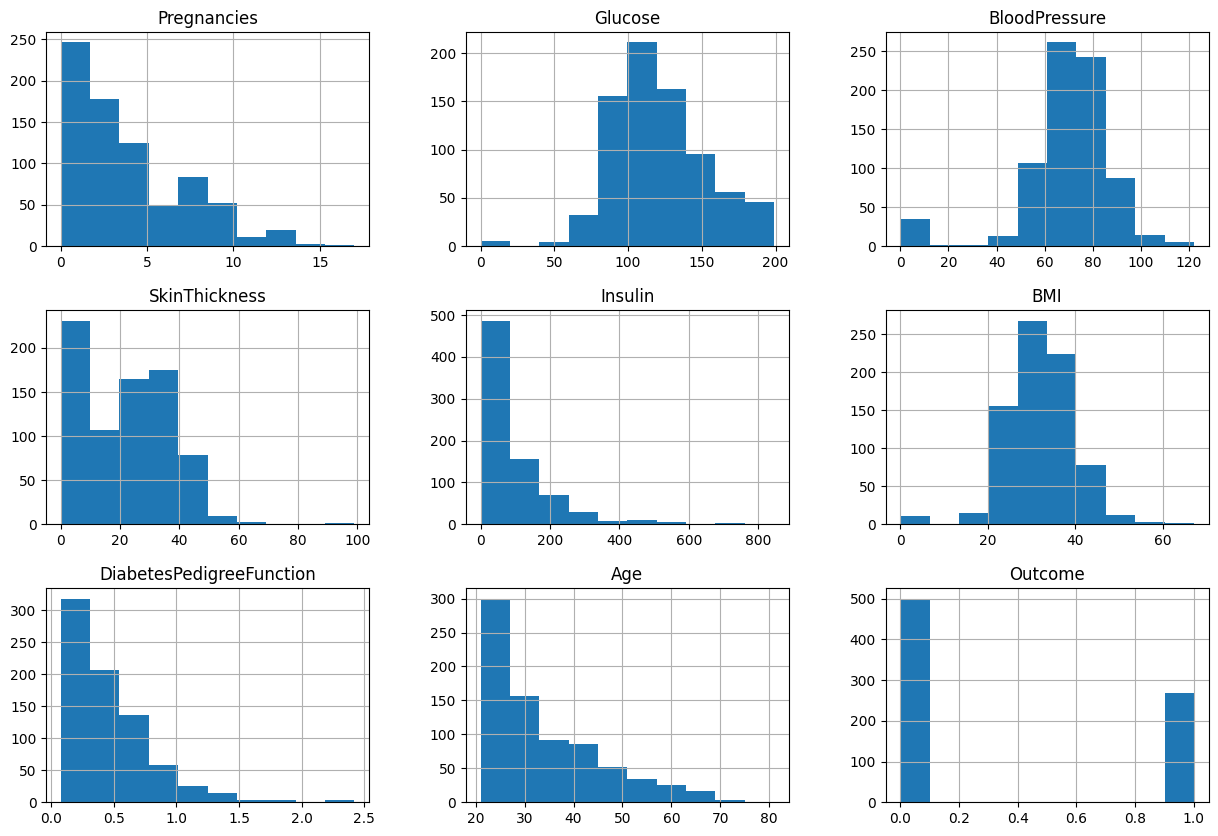

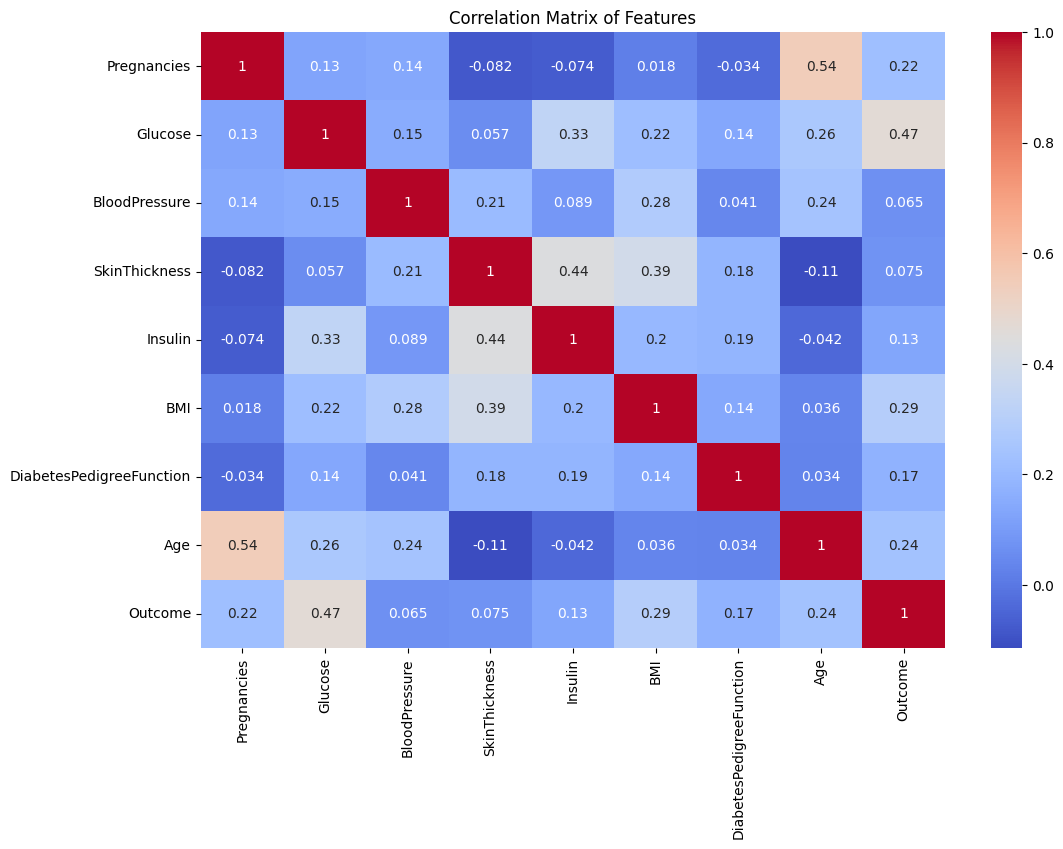

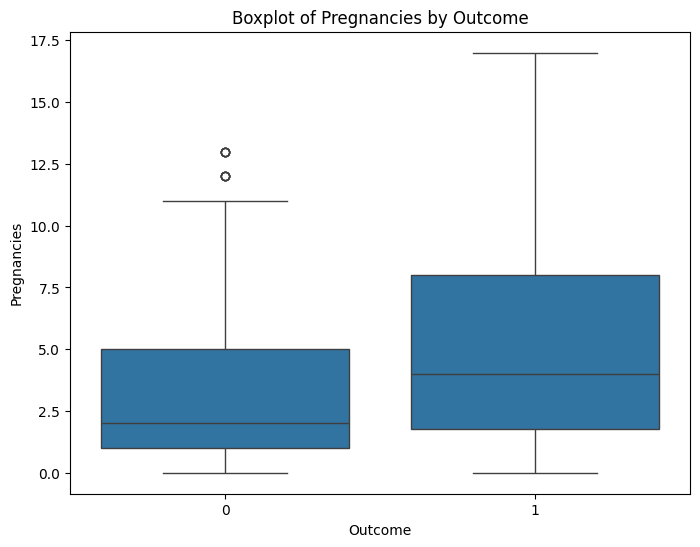

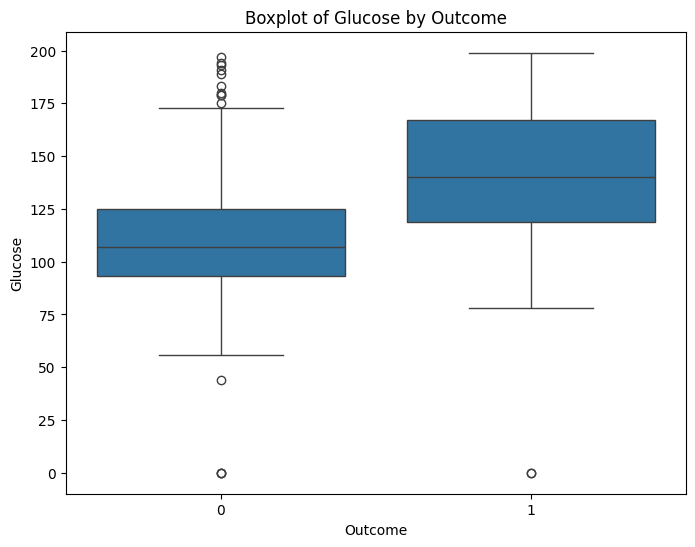

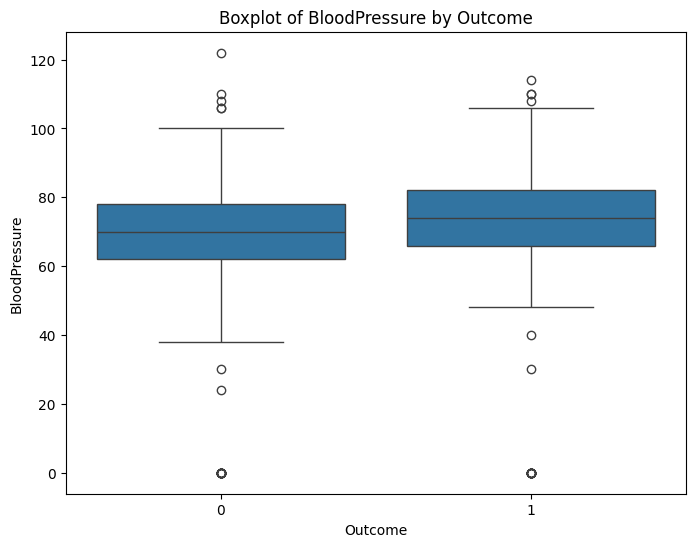

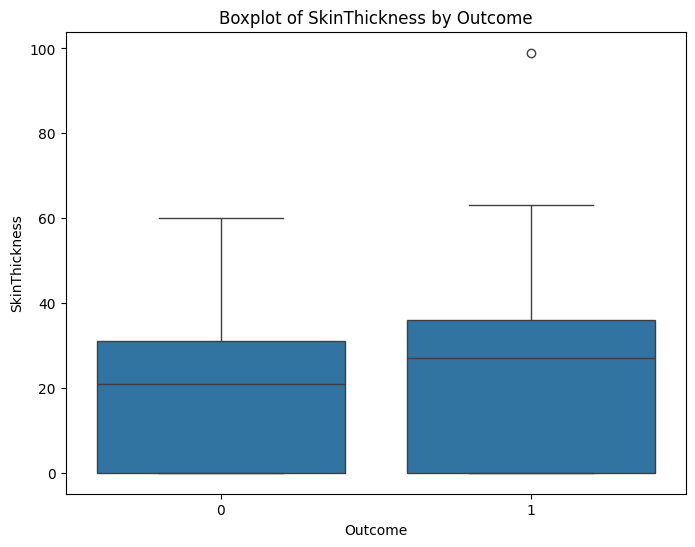

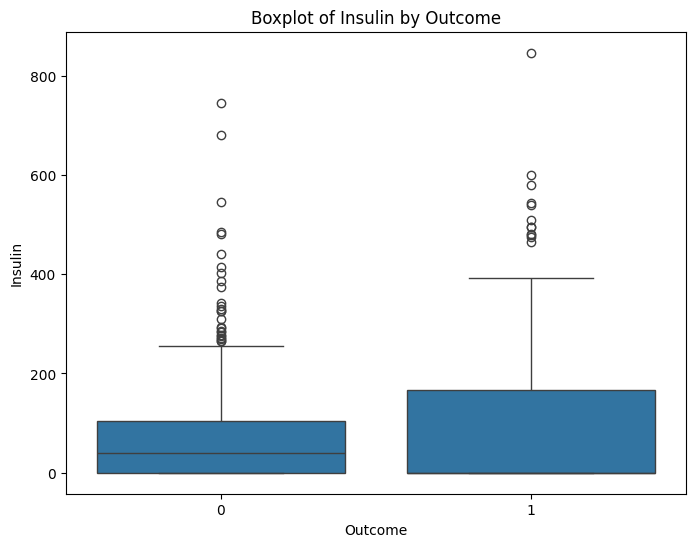

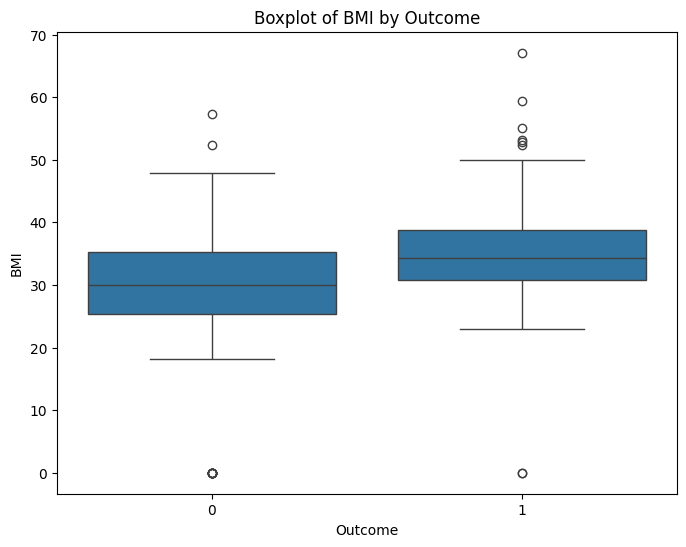

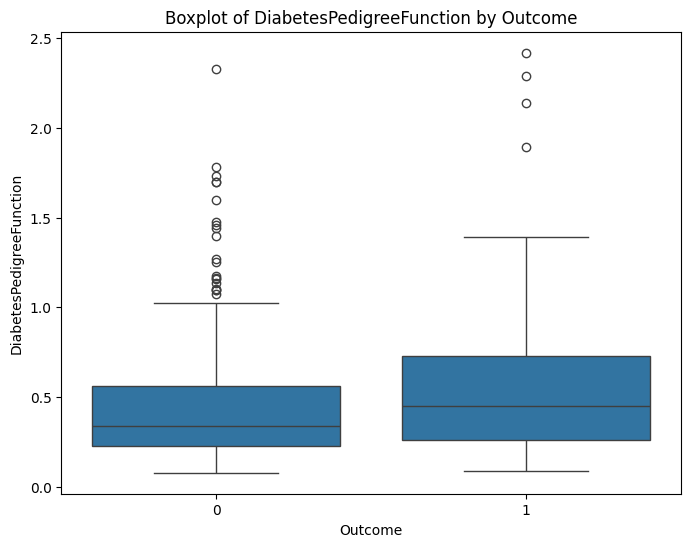

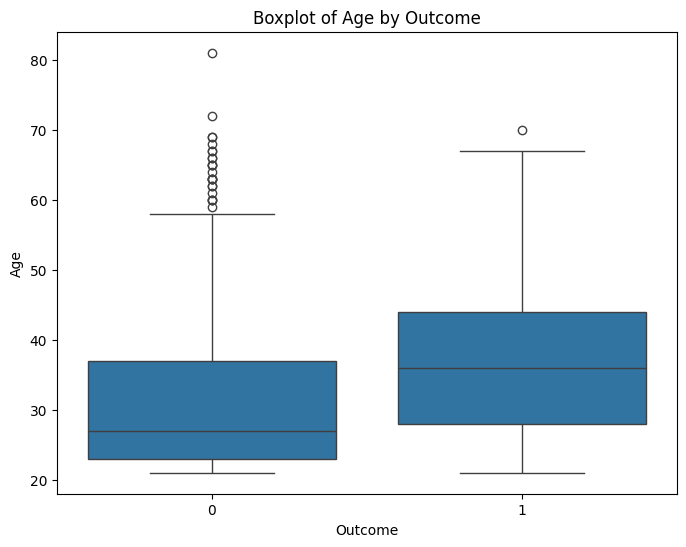

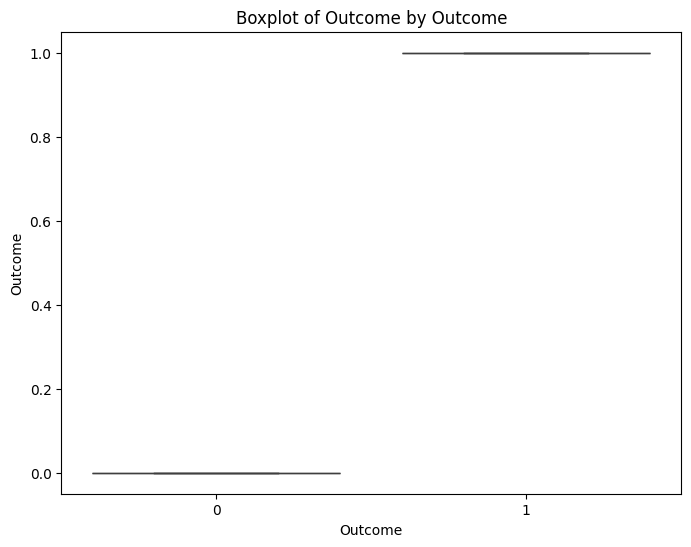

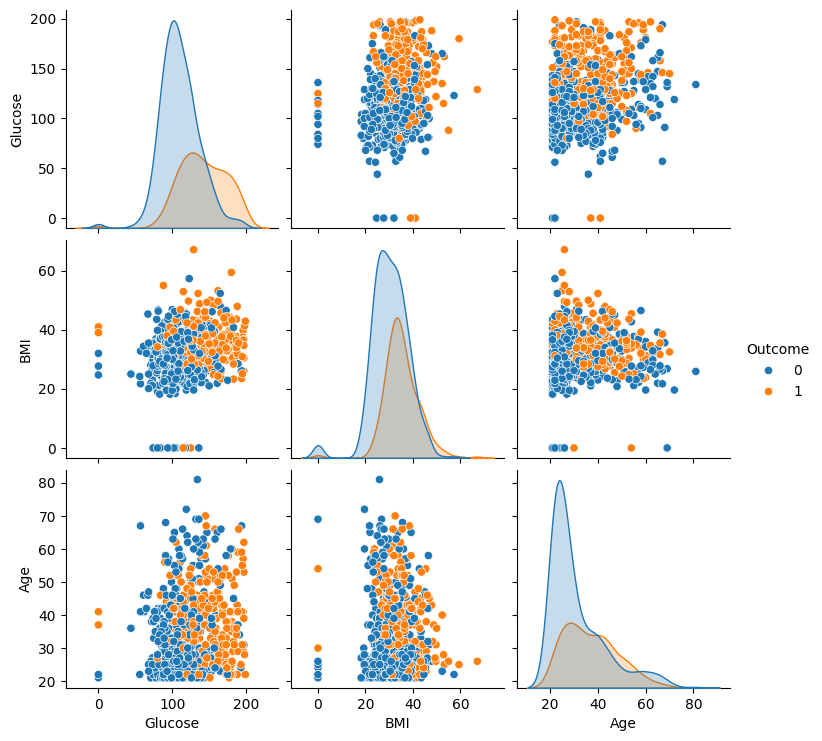

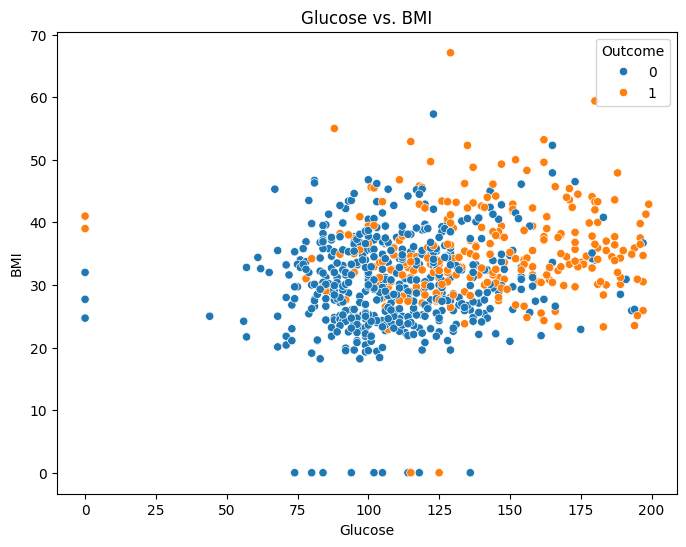

In [5]:
# Visualizations
plt.figure(figsize=(10,6))
sns.countplot(x='Outcome', data=data)
plt.title('Distribution of Outcome')
plt.show()

# Histograms for numerical features
data.hist(figsize=(15,10))
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(12,8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

# Boxplots for numerical features
for column in data.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Outcome', y=column, data=data)
    plt.title(f'Boxplot of {column} by Outcome')
    plt.show()

# Pairplot for selected features (example)
selected_features = ['Glucose', 'BMI', 'Age', 'Outcome']
sns.pairplot(data[selected_features], hue='Outcome')
plt.show()

# Additional visualizations as needed (e.g., scatter plots, violin plots)

# Example: Scatter plot of Glucose vs. BMI colored by Outcome
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=data)
plt.title('Glucose vs. BMI')
plt.show()

In [6]:

def check_duplicate_rows(df):
    duplicate_rows = df[df.duplicated(keep=False)]
    if not duplicate_rows.empty:
      print("Duplicate rows:")
      print(duplicate_rows)
    else:
      print("No duplicated data")


#check_duplicate_rows(data)
check_duplicate_rows(data)


No duplicated data


In [7]:

# Split data into features (X) and target (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [16]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
joblib.dump(scaler, "saved_models/scaler.joblib")


['saved_models/scaler.joblib']

In [9]:
# Dictionary of classification algorithms
algorithms = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVC": SVC(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, eval_metric='mlogloss'),
    "LightGBM": LGBMClassifier(random_state=42, verbose=-1),  # Suppress LightGBM logs
    "CatBoost": CatBoostClassifier(random_state=42, verbose=0),
    "Neural Network": MLPClassifier(random_state=42, max_iter=1000)
}


Training Logistic Regression...
Saved Logistic Regression model to saved_models/Logistic Regression.joblib
Logistic Regression Metrics:
Accuracy: 0.7532
Precision: 0.7554
Recall: 0.7532
F1 Score: 0.7542
----------------------------------------
Training Decision Tree...
Saved Decision Tree model to saved_models/Decision Tree.joblib
Decision Tree Metrics:
Accuracy: 0.7468
Precision: 0.7589
Recall: 0.7468
F1 Score: 0.7503
----------------------------------------
Training Random Forest...
Saved Random Forest model to saved_models/Random Forest.joblib
Random Forest Metrics:
Accuracy: 0.7208
Precision: 0.7219
Recall: 0.7208
F1 Score: 0.7213
----------------------------------------
Training SVC...
Saved SVC model to saved_models/SVC.joblib
SVC Metrics:
Accuracy: 0.7338
Precision: 0.7280
Recall: 0.7338
F1 Score: 0.7293
----------------------------------------
Training KNN...
Saved KNN model to saved_models/KNN.joblib
KNN Metrics:
Accuracy: 0.6948
Precision: 0.6874
Recall: 0.6948
F1 Score: 0.68

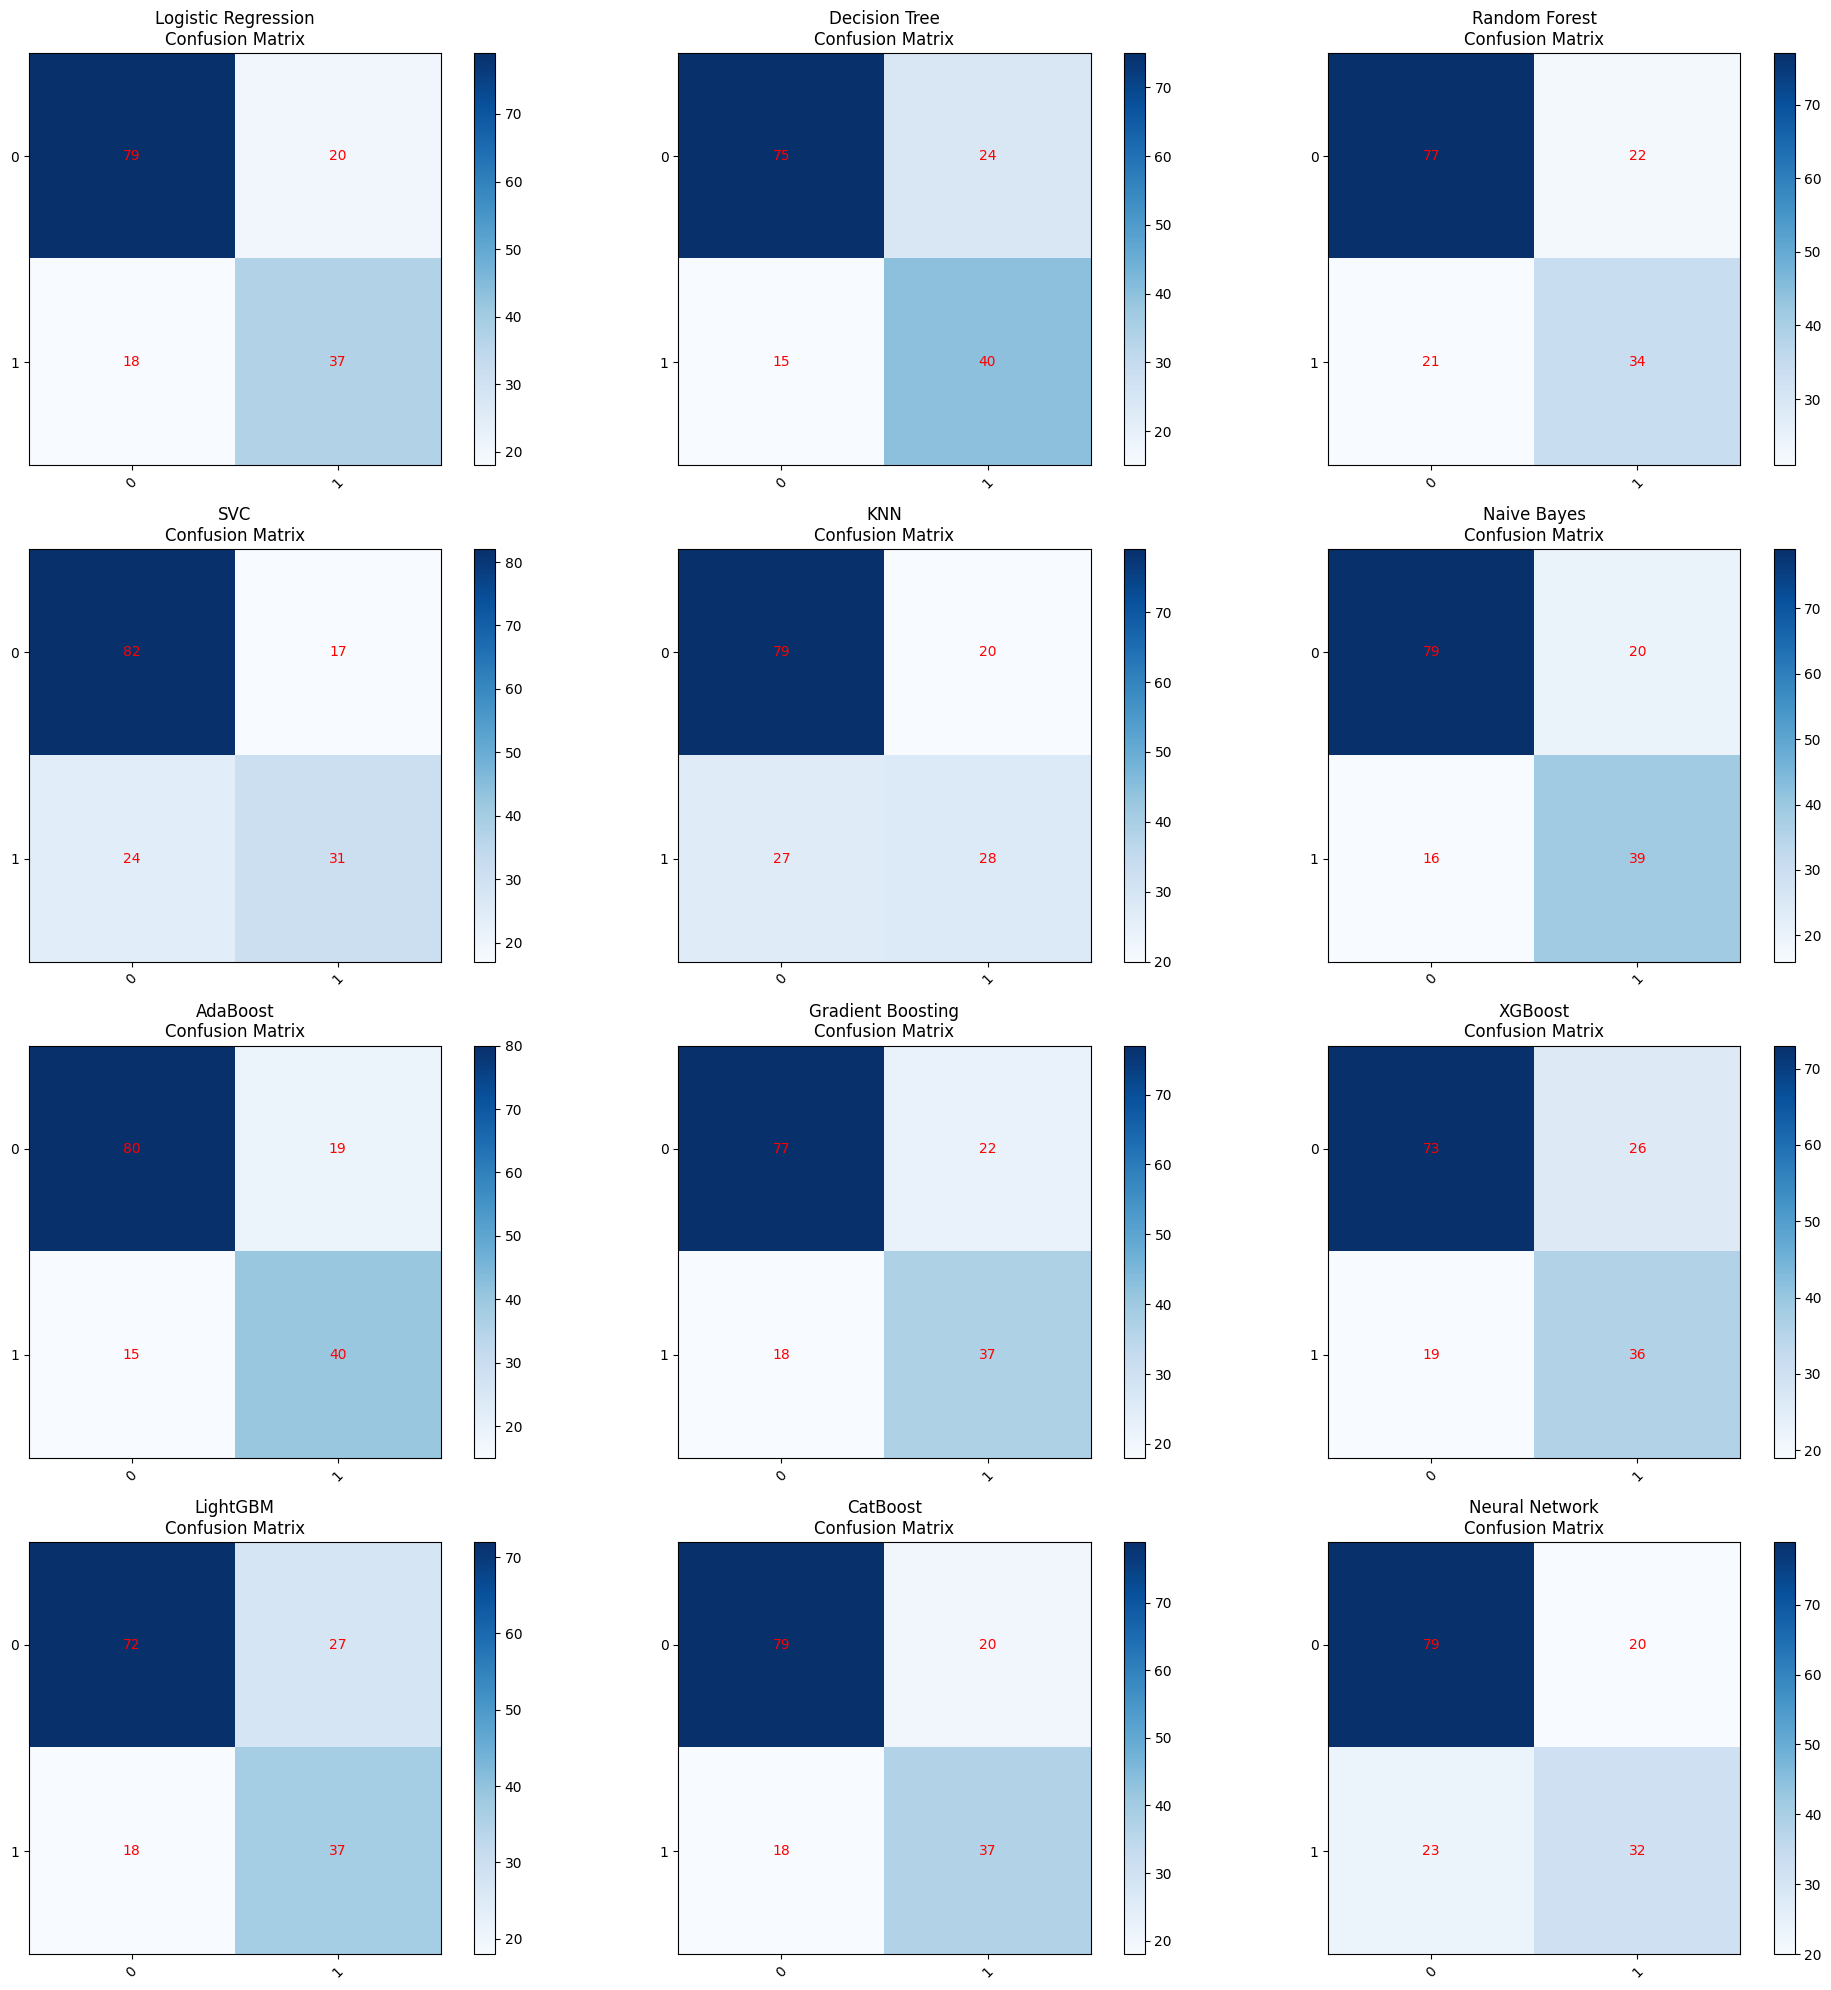

In [13]:


# Initialize a figure for confusion matrices
plt.figure(figsize=(20, 20))
models_dir = "saved_models"
os.makedirs(models_dir, exist_ok=True)

# Dictionary to store results for all models
results = {}

# Train and evaluate each algorithm
for i, (name, model) in enumerate(algorithms.items()):
    print(f"Training {name}...")
    model.fit(X_train, y_train)

    # Save the trained model
    model_filename = os.path.join(models_dir, f"{name}.joblib")
    joblib.dump(model, model_filename)
    print(f"Saved {name} model to {model_filename}")

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Store metrics in the results dictionary
    results[name] = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "confusion_matrix": confusion_matrix(y_test, y_pred)
    }

    # Print metrics
    print(f"{name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("-" * 40)

    # Plot confusion matrix in a subplot
    cm = results[name]["confusion_matrix"]
    plt.subplot(4, 3, i + 1)  # 4 rows, 3 columns for 12 algorithms
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f"{name}\nConfusion Matrix")
    plt.colorbar()

    # Get the number of unique classes in the target variable
    num_classes = len(np.unique(y_test))

    tick_marks = np.arange(num_classes)  # Use num_classes instead of hardcoding 7
    plt.xticks(tick_marks, np.unique(y_test), rotation=45)  # Use unique class labels
    plt.yticks(tick_marks, np.unique(y_test))  # Use unique class labels

    # Labeling the matrix - adjust loop ranges
    for j in range(cm.shape[0]):  # Iterate over actual classes (rows)
        for k in range(cm.shape[1]):  # Iterate over predicted classes (columns)
            plt.text(k, j, format(cm[j, k], 'd'), ha="center", va="center", color="red")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


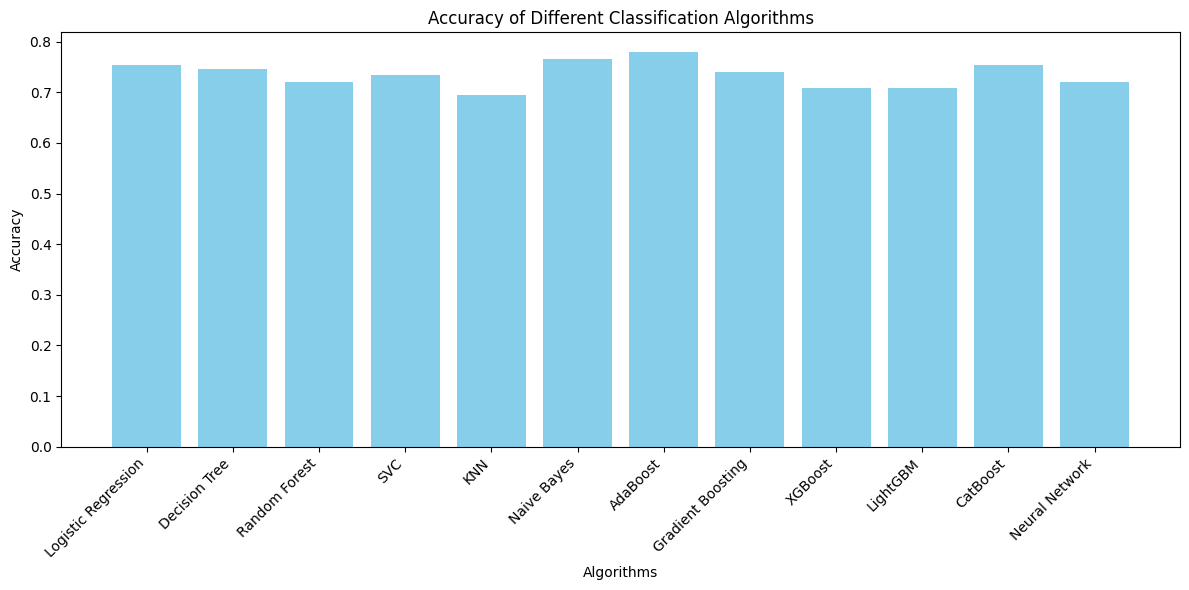

In [15]:

algorithm_names = list(results.keys())
accuracy_scores = [results[algo]["accuracy"] for algo in algorithm_names]

plt.figure(figsize=(12, 6))
plt.bar(algorithm_names, accuracy_scores, color='skyblue')
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Accuracy of Different Classification Algorithms")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [17]:

# Load the scaler
scaler = StandardScaler()
# Load the scaler from the saved file (if it exists)
scaler_filename = "saved_models/scaler.joblib"  # Assuming you saved it as scaler.joblib
try:
    scaler = joblib.load(scaler_filename)
    print(f"Loaded scaler from {scaler_filename}")
except FileNotFoundError:
    print(f"Scaler file not found at {scaler_filename}. Please ensure the scaler file exists or train the model first.")


# Example new records (replace with your actual data)
new_records = pd.DataFrame({
    'Pregnancies': [6, 1],
    'Glucose': [148, 85],
    'BloodPressure': [72, 66],
    'SkinThickness': [35, 29],
    'Insulin': [0, 0],
    'BMI': [33.6, 26.6],
    'DiabetesPedigreeFunction': [0.627, 0.351],
    'Age': [50, 31]
})

# Preprocess the new records using the loaded scaler
new_records_scaled = scaler.transform(new_records)


models_dir = "saved_models"
# Load all saved models and make predictions
for filename in os.listdir(models_dir):
    if filename.endswith(".joblib") and filename != "scaler.joblib":  # Exclude the scaler file
        model_name = filename[:-7]  # Remove the .joblib extension
        model_path = os.path.join(models_dir, filename)
        try:
            model = joblib.load(model_path)
            print(f"Loaded model: {model_name}")
            predictions = model.predict(new_records_scaled)
            print(f"Predictions for {model_name}: {predictions}")
        except Exception as e:
            print(f"Error loading or predicting with model {model_name}: {e}")

Loaded scaler from saved_models/scaler.joblib
Loaded model: LightGBM
Predictions for LightGBM: [1 0]
Loaded model: Logistic Regression
Predictions for Logistic Regression: [1 0]
Loaded model: Neural Network
Predictions for Neural Network: [1 0]
Loaded model: AdaBoost
Predictions for AdaBoost: [1 0]
Loaded model: Random Forest
Predictions for Random Forest: [1 0]
Loaded model: XGBoost
Predictions for XGBoost: [1 0]
Loaded model: Decision Tree
Predictions for Decision Tree: [1 0]
Loaded model: CatBoost
Predictions for CatBoost: [1 0]
Loaded model: KNN
Predictions for KNN: [1 0]
Loaded model: SVC
Predictions for SVC: [1 0]
Loaded model: Gradient Boosting
Predictions for Gradient Boosting: [1 0]
Loaded model: Naive Bayes
Predictions for Naive Bayes: [1 0]
